# 5.11. Performing out-of-core computations on large arrays with Dask

In [1]:
import numpy as np
import dask.array as da
import memory_profiler

In [2]:
%load_ext memory_profiler

In [3]:
Y = da.random.normal(size=(10000, 10000),
                     chunks=(1000, 1000))

In [4]:
Y

dask.array<da.random.normal, shape=(10000, 10000),
    dtype=float64, chunksize=(1000, 1000)>

In [5]:
Y.shape, Y.size, Y.chunks

((10000, 10000),
 100000000,
 ((1000, ..., 1000),
  (1000, ..., 1000)))

In [6]:
mu = Y.mean(axis=0)
mu

dask.array<mean_agg-aggregate, shape=(10000,),
    dtype=float64, chunksize=(1000,)>

In [7]:
mu[0].compute()

0.011

In [8]:
def f_numpy():
    X = np.random.normal(size=(10000, 10000))
    x = X.mean(axis=0)[0:100]

In [9]:
%%memit
f_numpy()

peak memory: 916.32 MiB, increment: 763.00 MiB


In [10]:
%%time
f_numpy()

CPU times: user 3.86 s, sys: 664 ms, total: 4.52 s
Wall time: 4.52 s


In [11]:
def f_dask():
    Y = da.random.normal(size=(10000, 10000),
                         chunks=(1000, 1000))
    y = Y.mean(axis=0)[0:100].compute()

In [12]:
%%memit
f_dask()

peak memory: 221.42 MiB, increment: 67.64 MiB


In [13]:
%%time
f_dask()

CPU times: user 492 ms, sys: 12 ms, total: 504 ms
Wall time: 105 ms


In [14]:
def f_dask2():
    Y = da.random.normal(size=(10000, 10000),
                         chunks=(10000, 100))
    y = Y.mean(axis=0)[0:100].compute()

In [15]:
%%memit
f_dask2()

peak memory: 145.60 MiB, increment: 6.93 MiB


In [16]:
%%time
f_dask2()

CPU times: user 48 ms, sys: 8 ms, total: 56 ms
Wall time: 57.4 ms


In [17]:
from dask.distributed import Client

In [18]:
client = Client()

In [19]:
client

In [20]:
Y.sum().compute()

4090.221

In [21]:
future = client.compute(Y.sum())

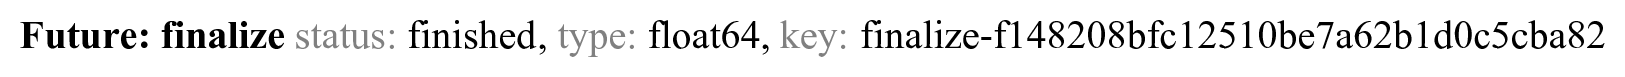

In [22]:
future

In [23]:
future.result()

4090.221

In [24]:
huge = da.random.uniform(
    size=(1500000, 100000), chunks=(10000, 10000))
"Size in memory: %.1f GB" % (huge.nbytes / 1024 ** 3)

'Size in memory: 1117.6 GB'

In [25]:
from dask.diagnostics import ProgressBar
# WARNING: this will take a very long time computing
# useless values. This is for pedagogical purposes
# only.
with ProgressBar():
    m = huge.mean().compute()

[##                   ] | 11% Completed |  1min 44.8s
